
#  Car Resale Price Analysis & Visualization System

## Problem Statement
 You are a data analyst working for a car dealership. You have received a CSV file containing sales data.
 Your goal is to understand the sales pattern, customer behavior, and make visual insights using Python basics,
 Object-Oriented Programming (OOP), NumPy, Pandas, Matplotlib, and Seaborn.

Your job includes:
- Data cleaning and preprocessing
- Basic analysis
- OOP implementation
- Visualization
- Extracting insights


In [5]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#importing the dataset 
car_data = pd.read_csv('daTA.csv')

### Preview data

In [13]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [15]:
print(car_data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [17]:
print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


### Data Cleaning

In [26]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
car_data = car_data.drop_duplicates()

In [32]:
car_data = car_data.dropna()

### Object Oriented programming

In [35]:
class CarDataAnalysis:
    def __init__(self, data):
        self.data = data

    def clean_data(self):
        self.data.drop_duplicates(inplace=True)
        self.data.dropna(inplace=True)

    def average_price_by_brand(self):
        return self.data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

    def top_models(self, top_n=5):
        return self.data['Car_Name'].value_counts().head(top_n)

    def price_distribution(self):
        sns.histplot(self.data['Selling_Price'], kde=True)
        plt.title("Price Distribution")
        plt.xlabel("Price")
        plt.show()

    def scatter_price_vs_kms_driven(self):
        sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=self.data)
        plt.title("Price vs Kms_Driven")
        plt.show()

In [45]:
# Create an instance of your class
car_analysis = CarDataAnalysis(car_data)

#Average price by car
avg_price = car_analysis.average_price_by_brand()
print("Average Price by Brand:\n", avg_price)

Average Price by Brand:
 Car_Name
land cruiser           35.000000
fortuner               18.254000
innova                 12.777778
creta                  11.800000
elantra                11.600000
                         ...    
Hero  CBZ Xtreme        0.200000
Hero Hunk               0.200000
Hero Super Splendor     0.200000
Bajaj  ct 100           0.180000
Bajaj Discover 125      0.175000
Name: Selling_Price, Length: 98, dtype: float64


In [47]:
#Top models
top_m = car_analysis.top_models()
print("Top models\n", top_m)

Top models
 Car_Name
city             26
corolla altis    16
verna            14
brio             10
fortuner         10
Name: count, dtype: int64


### Visualization

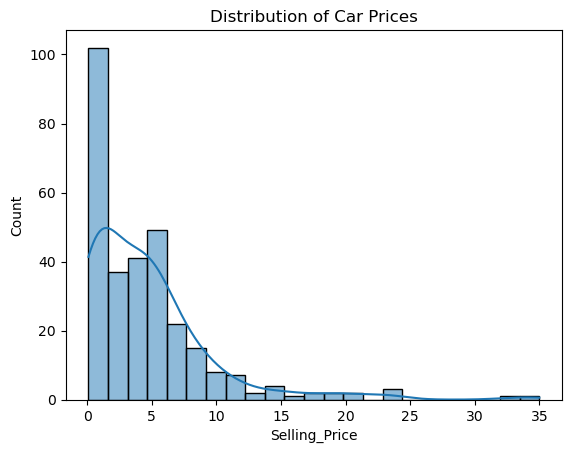

In [50]:
#price distribution
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.show()

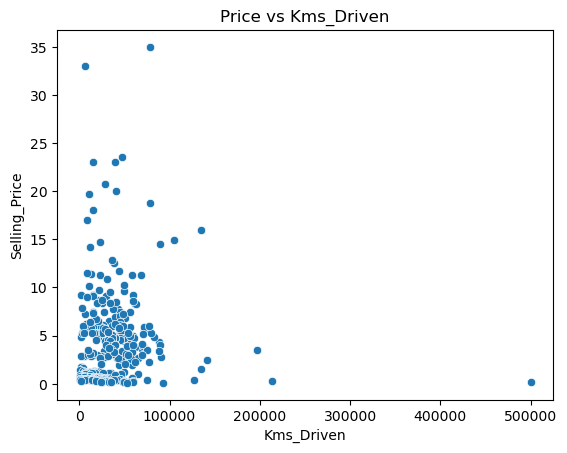

In [54]:
#Selling price vs kms driven
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=car_data)
plt.title("Price vs Kms_Driven")
plt.show()

### Extracting insights

#### Are newer cars significantly more expensive?

Average price by car year:
 Year
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.642500
2016    5.161429
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64


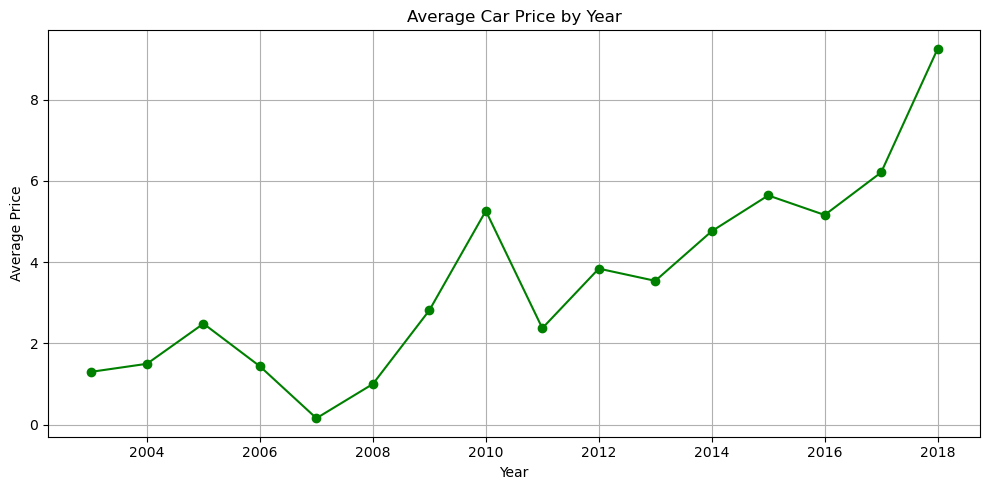

In [65]:
# Group by year and compute average price
avg_price_by_year = car_data.groupby('Year')['Selling_Price'].mean().sort_index(ascending=True)

# Print and plot
print("Average price by car year:\n", avg_price_by_year.tail(10))  # Show last 10 years

plt.figure(figsize=(10,5))
avg_price_by_year.plot(kind='line', marker='o', color='green')
plt.title("Average Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

#### What fuel type is most popular or cheapest?

Fuel type popularity:
 Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Average price by fuel type:
 Fuel_Type
CNG        3.100000
Petrol     3.264184
Diesel    10.102759
Name: Selling_Price, dtype: float64


/var/folders/2n/hfl8zq910m3dwj_b42dhk7300000gn/T/ipykernel_5554/867258070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_avg_price.index, y=fuel_avg_price.values, palette='pastel')


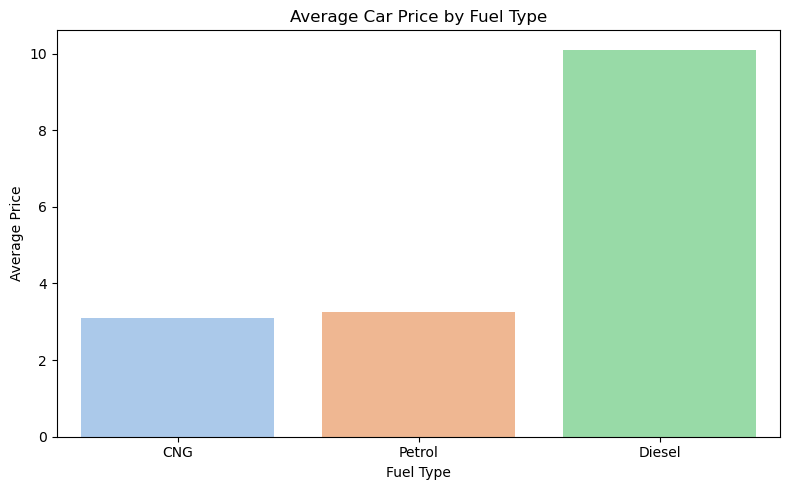

In [73]:
# Most popular fuel type
fuel_counts = car_data['Fuel_Type'].value_counts()
print("Fuel type popularity:\n", fuel_counts)

# Cheapest (and most expensive) fuel types on average
fuel_avg_price = car_data.groupby('Fuel_Type')['Selling_Price'].mean().sort_values()
print("Average price by fuel type:\n", fuel_avg_price)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=fuel_avg_price.index, y=fuel_avg_price.values, palette='pastel')
plt.title("Average Car Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()